In [170]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/vera0519/vera_911')
import pandas as pd
# import cenpy
import src.features.call_types as call_types
from src.cities.new_orleans import NewOrleans
from src.cities.seattle import Seattle
from src.cities.dallas import Dallas
from src.cities.detroit import Detroit
from src.cities.charleston import Charleston
import matplotlib.pyplot as plt
import src.features.geo as Geo
from src.features.call_types import load_call_mappings, assign_disposition, process
import src.visualization.visualize as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
from src.features.call_types import load_disposition_mappings

In [107]:
mappings= load_disposition_mappings()

In [165]:
m = mappings[mappings['City'].str.replace(" ","") =='NewOrleans'].set_index('in_category').to_dict()['out_category']

In [167]:
m

{'Necessary Action Taken': 'Enforcement Activity ',
 'NECESSARY ACTION TAKEN': 'Enforcement Activity ',
 'REPORT TO FOLLOW': 'Report Generated',
 'GONE ON ARRIVAL': 'Unfounded',
 'UNFOUNDED': 'Unfounded',
 'VOID': 'Unfounded',
 'DUPLICATE': 'Repeat ',
 'MUNICIPAL NECESSARY ACTION TAK': 'Non-Arrest Activity',
 'SUPPLEMENTAL': 'Non-Arrest Activity',
 'TRUANCY NECESSARY ACTION TAKEN': 'Non-Arrest Activity',
 'NEC. ACTION TAKEN 2 CITATIONS': 'Citation Issued',
 'UNKNOWN': nan,
 'Test incident': nan,
 'NEC. ACTION TAKEN 1 CITATION': 'Citation Issued',
 'CURFEW NECESSARY ACTION TAKEN': 'Citation Issued',
 'REPORT TO FOLLOW CURFEW': 'Report Generated',
 'REPORT TO FOLLOW MUNICIPAL': 'Report Generated',
 'FALSE ALARM': 'False Complaint',
 'REPORT TO FOLLOW TRUANCY': 'Report Generated',
 'TEST MOTOROLA': nan,
 'CREATED ON SYS DOWN/RESEARCH': nan,
 'NAT - NO CITATIONS ISSUED': nan}

In [168]:
new_orleans.processing_progress = [ ]
process(new_orleans)

In [169]:
new_orleans.processed_data.disposition

0          Enforcement Activity 
1          Enforcement Activity 
2          Enforcement Activity 
3          Enforcement Activity 
4          Enforcement Activity 
5          Enforcement Activity 
6          Enforcement Activity 
7          Enforcement Activity 
8          Enforcement Activity 
9          Enforcement Activity 
10         Enforcement Activity 
11         Enforcement Activity 
12                     Unfounded
13         Enforcement Activity 
14                     Unfounded
15                     Unfounded
16         Enforcement Activity 
17         Enforcement Activity 
18                     Unfounded
19              Report Generated
20                     Unfounded
21         Enforcement Activity 
22                     Unfounded
23         Enforcement Activity 
24                     Unfounded
25                     Unfounded
26         Enforcement Activity 
27         Enforcement Activity 
28                     Unfounded
29                     Unfounded
          

In [151]:
new_orleans.processed_data.disposition

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
3833562    None
3833563    None
3833564    None
3833565    None
3833566    None
3833567    None
3833568    None
3833569    None
3833570    None
3833571    None
3833572    None
3833573    None
3833574    None
3833575    None
3833576    None
3833577    None
3833578    None
3833579    None
3833580    None
3833581    None
3833582    None
3833583    None
3833584    None
3833585    None
3833586    None
3833587    None
3833588    None
3833589    None
3833590    None
3833591    None
Name: disposition, Lengt

In [134]:
new_orleans.processed_data=new_orleans.load_raw_data()

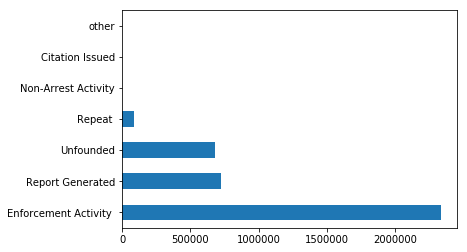

In [146]:
new_orleans.processed_data['DispositionText'].apply(lambda x: m[x] if x in m else 'other').value_counts().plot(kind='barh')

In [171]:
new_orleans = NewOrleans()

In [114]:
data = new_orleans.raw_data()

TypeError: 'DataFrame' object is not callable

In [172]:
new_orleans.process_data()

procesisng geo for  <src.cities.new_orleans.NewOrleans object at 0x7fe8d04e6a58>
Loading data from local cache
Reanaming positional columns
Converting Geo units


  0%|          | 0/3833592 [00:00<?, ?it/s]

Generating point geometries


  0%|          | 0/384 [00:00<?, ?it/s]

Joining to tracts


100%|██████████| 384/384 [03:01<00:00,  2.71it/s]


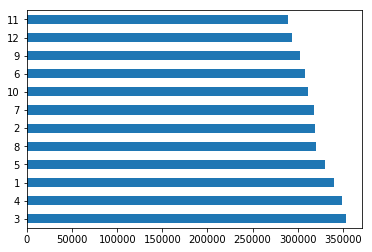

In [23]:
new_orleans.B

In [ ]:
from urllib.request import urlretrieve

In [88]:
from src.cities.new_orleans import NewOrleans
seattle = Seattle()
dallas = Dallas() 
detroit = Detroit()
new_orleans = NewOrleans()
charleston = Charleston()

In [12]:
detroit.raw_data.head()

,index,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,...,Council District,Longitude,Latitude,Incident Location,Hardest Hit Fund Areas,City Council Districts,Detroit Neighborhoods,Scout Car Areas,Counties,Zip Codes
0,0,201914004464,DPD,3800 block of HOLCOMB ST,48214,NaN,843020,UNKNOWN PROBLEM,UNKPROB,05/20/2019 11:58:31 PM,...,5.0,-82.996142,42.371491,"location\n(42.37149, -82.99614)",NaN,3.0,1.0,48.0,1345.0,19203.0
1,1,201914004463,DPD,7400 block of PARKWOOD ST,48210,NaN,825030,DISTURBANCE,DISTURB,05/20/2019 11:57:46 PM,...,6.0,-83.133554,42.326430,"location\n(42.32643, -83.13355)",18.0,5.0,36.0,21.0,1345.0,7314.0
2,2,201914004461,DPD,200 block of -BLK SMITH ST,48202,NaN,342010,SHOTS FIRED IP,SHOTS IP,05/20/2019 11:56:15 PM,...,5.0,-83.072944,42.373999,"location\n(42.374, -83.07294)",5.0,3.0,148.0,134.0,1345.0,14467.0
3,3,201914004459,DPD,1000 block of HIBBARD ST,48214,NaN,875030,HANGUP CALLS,HNGUP,05/20/2019 11:56:13 PM,...,5.0,-82.987616,42.357798,"location\n(42.3578, -82.98762)",NaN,3.0,76.0,51.0,1345.0,19203.0
4,4,201914004457,DPD,17200 block of ROSELAWN ST,48221,NaN,843020,UNKNOWN PROBLEM,UNKPROB,05/20/2019 11:55:25 PM,...,2.0,-83.152330,42.418006,"location\n(42.41801, -83.15233)",15.0,2.0,39.0,91.0,1345.0,19615.0


In [4]:
new_orleans.process_data()
#detroit.process_data()
# charleston.process_data()

procesisng geo for  <src.cities.new_orleans.NewOrleans object at 0x7ff1fc6b7e48>
Loading data from local cache
Reanaming positional columns
Converting Geo units


  0%|          | 0/3833592 [00:00<?, ?it/s]

Generating point geometries


100%|██████████| 3833592/3833592 [02:51<00:00, 22379.89it/s]


Joining to tracts


100%|██████████| 384/384 [02:56<00:00,  2.66it/s]


{'call_type': 'InitialTypeText', 'self_initiated': 'SelfInitiated', 'priority': 'Priority', 'disposition': 'DispositionText'}


In [6]:
new_orleans.processed_data.head()

,index,(ALTERNATE) - Neighborhood Statistical Areas,BLOCK_ADDRESS,Beat,Blocks,Census - 2010,Council Districts,Disposition,DispositionText,InitialPriority,...,B25072_010E,B25072_016E,B25072_017E,B25072_014E,B25072_015E,B25072_018E,B25072_019E,call_type,self_initiated,disposition
0,0,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,other,other
1,1,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,other,other
2,2,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,other,other
3,3,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,other,other
4,4,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,other,other


In [ ]:
ax = new_orleans.load_tracts().to_crs({'init':'epsg:4326'}).plot(color='none', edgecolor='black')
new_orleans.processed_data[new_orleans.processed_data.geometry.y  > 20].sample(300).plot(ax=ax, size=0.2,alpha=0.2)

In [ ]:
new_orleans.processed_data.

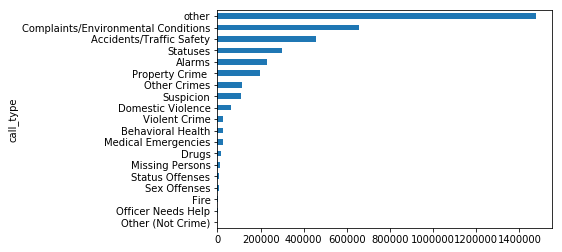

In [9]:
detroit.processed_data.groupby('call_type').count()['index'].sort_values(ascending=True).plot(kind='barh')

In [35]:
new_orleans.processed_data[['index',"GEOID",'call_type','self_initiated','disposition','Beat','Priority','response_time']].tail()

new_orleans.processed_data = new_orleans.processed_data.assign(response_time =(new_orleans.processed_data.TimeClosed -new_orleans.processed_data.TimeCreate).dt.seconds)

In [42]:
new_orleans.processed_data.disposition.value_counts()

other    3833592
Name: disposition, dtype: int64

In [39]:
new_orleans.processed_data[['index',"GEOID",'call_type','self_initiated','disposition','Beat','Priority','response_time']].sample(10)

,index,GEOID,call_type,self_initiated,disposition,Beat,Priority,response_time
1215283,200118,22071004900,other,other,other,None,2B,854.0
1971856,45610,22071006300,Statuses,Yes,other,1L01,1G,1093.0
1865572,386788,22071013500,Accidents/Traffic Safety,No,other,8E04,2A,2168.0
843257,333104,NaN,other,other,other,None,1G,1926.0
2251972,325726,22071007200,Other Crimes,No,other,2V03,2B,1973.0
2033988,107742,22071009000,Alarms,No,other,6D02,2C,202.0
525899,15746,22071000605,other,other,other,None,1G,4012.0
441285,441285,22071001722,other,other,other,None,2C,7026.0
3421957,214805,22071007800,Complaints/Environmental Conditions,Yes,other,6B05,1J,5941.0
3211260,4108,22071002502,Suspicion,No,other,3S07,2A,1422.0


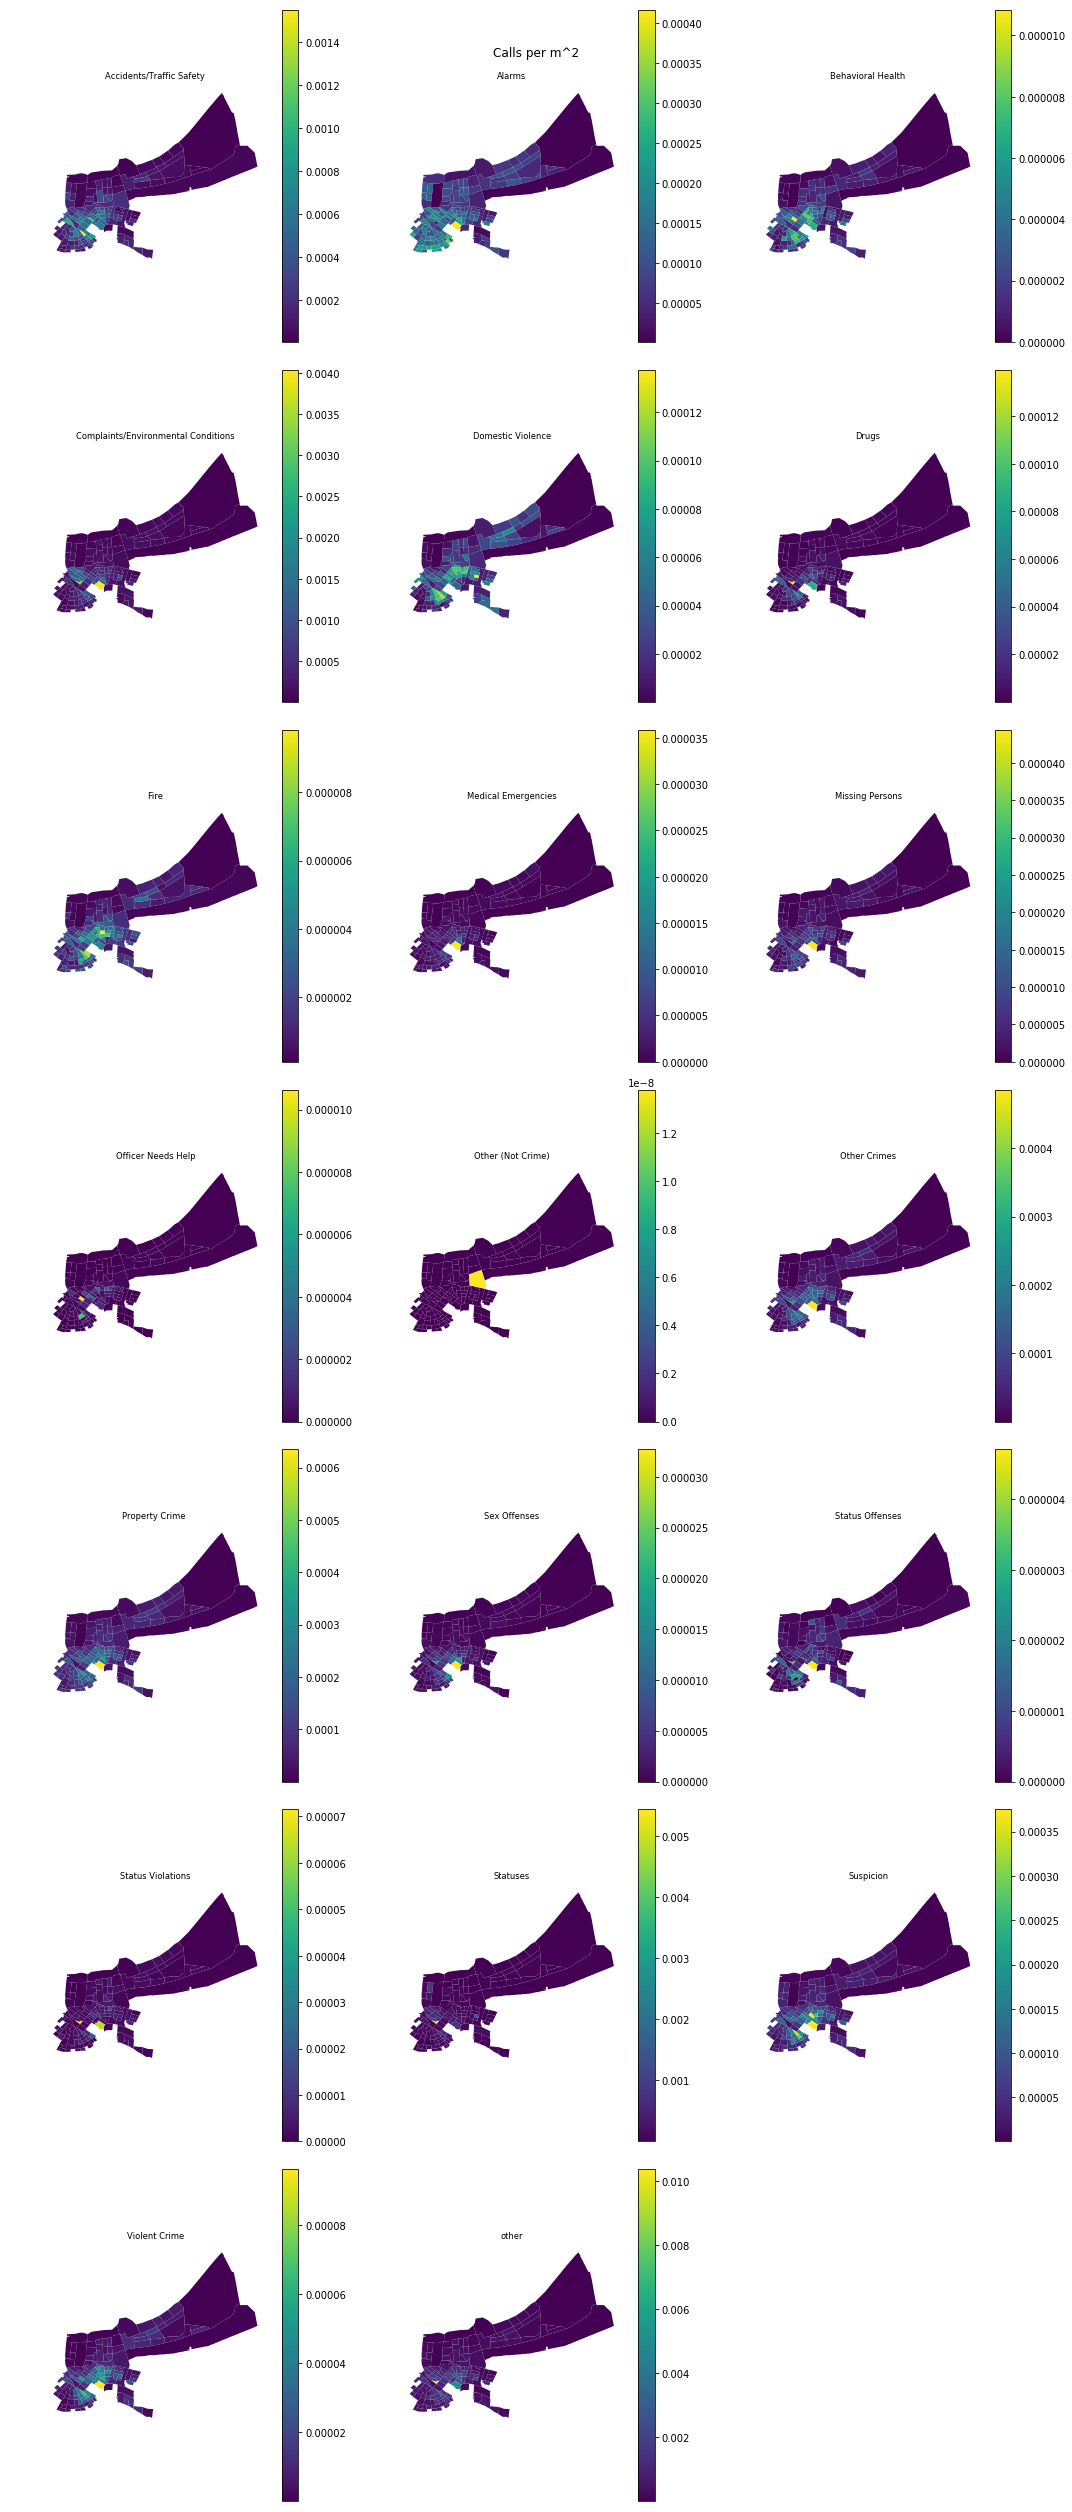

In [4]:
vis.map_all_call_types(new_orleans,norm_by='area', per_row=3)

In [ ]:
ax = vis.map_self_initated(new_orleans, norm_by='area', year=2015)
ax

In [82]:
ax.set_facecolor('black')
ax

In [24]:
new_orleans.call_volumne_by_tract().head()

KeyboardInterrupt: 

In [39]:
new_orleans.processed_data[['GEOID','B01003_001E']].drop_duplicates().set_index('GEOID')

,B01003_001E
GEOID,
22071014500,2102.0
22071013500,2008.0
22071006900,874.0
22071002100,1106.0
22071000616,4315.0
22071001737,3411.0
22071001735,2265.0
22071014000,2007.0
22071000602,2530.0


In [47]:
calls_per_capita = (new_orleans.processed_data
             .groupby('GEOID')
             .count()
             .assign(population = new_orleans.processed_data[['GEOID','B01003_001E']]
                 .drop_duplicates()
                 .set_index('GEOID'))
             .assign()
             .assign(calls_per_capita= lambda x: x['index'] / x['population'])
)

calls_per_capita = new_orleans.assign_geometry(calls_per_capita)

In [50]:
tracts = new_orleans.load_tracts()

ValueError: supplied range of [1.7752736638763684, inf] is not finite

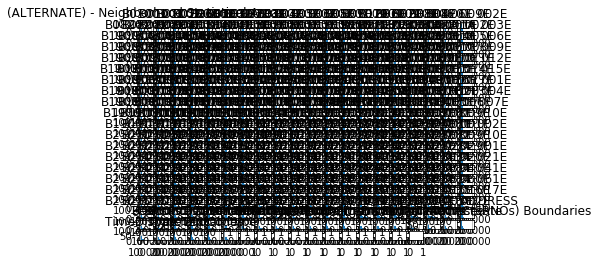

In [57]:
calls_per_capita.hist()

[14:26:41.049 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/matplotlib/colors.py:958: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)

[14:26:41.050 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1



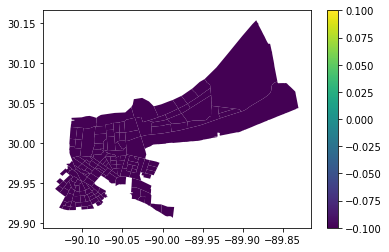

In [56]:
tracts.set_index('GEOID').assign(calls_per_capita= calls_per_capita['calls_per_capita']).plot(column='calls_per_capita', legend=True)

In [60]:
new_orleans.call_volume_by_tract(norm_by='capita').head()

MemoryError: 

In [59]:
calls_per_capita.plot(colum='calls_per_capita')

NameError: name 'calls_per_capita' is not defined

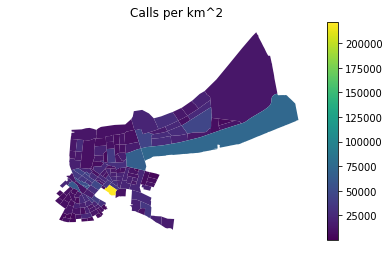

In [28]:
vis.map_call_volume(new_orleans,norm_by='area',log=True)

In [14]:
new_orleans.call_volumne_by_tract(norm_by='area').head()

GEOID
22071000100    10718
22071000602    20841
22071000603    12025
22071000604    36127
22071000605    26343
Name: calls, dtype: int64

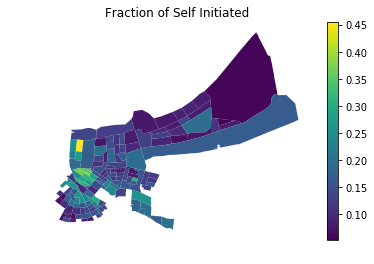

In [9]:
ax = det.self_initated_by_tract(norm_by='total').plot(column='Yes',legend=True)
ax.set_facecolor('black')
plt.title('Fraction of Self Initiated')
ax.set_axis_off()

In [1]:
new_orleans

NameError: name 'new_orleans' is not defined

In [58]:
new_orleans.processed_data.groupby(['call_type']).count().sort_values(ascending=False).plot(kind='barh')

TypeError: sort_values() missing 1 required positional argument: 'by'

In [52]:
(new_orleans.processed_data.groupby(['self_initiated', 'call_type'])
            .count()
            .reset_index()
            .pivot_table(index='call_type', columns='self_initiated', values='index')
            .fillna(0)
            .drop('other')
            .pipe(lambda x: x.div(x.sum(axis=1),axis=0))
            .sort_values(by='Yes')
).head().columns

Index(['No', 'Yes', 'other'], dtype='object', name='self_initiated')

Text(0, 0.5, '')

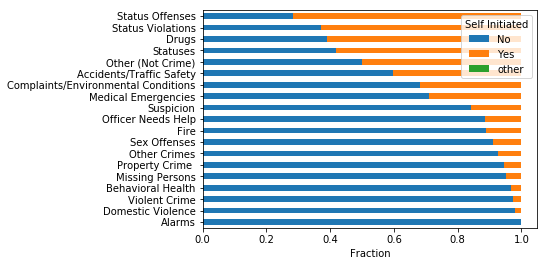

In [53]:
(new_orleans.processed_data.groupby(['self_initiated', 'call_type'])
            .count()
            .reset_index()
            .rename(columns={'self_initiated': 'Self Initiated'})
            .pivot_table(index='call_type', columns='Self Initiated', values='index')
            .fillna(0)
            .drop('other')
            .pipe(lambda x: x.div(x.sum(axis=1),axis=0))
            .sort_values(by='Yes')
).plot(kind='barh', stacked=True, label='Self Initiated')
plt.xlabel('Fraction')
plt.ylabel(None)

In [70]:
new_orleans.write_clean_data()

AttributeError: 'NewOrleans' object has no attribute 'write_clean_data'

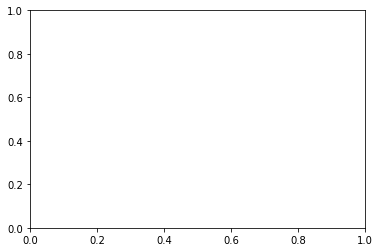

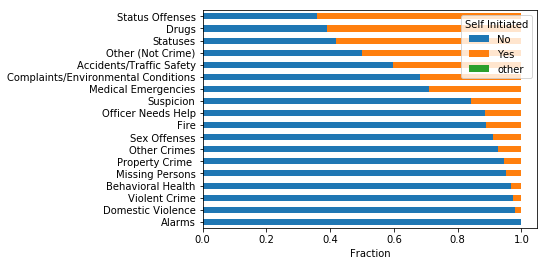

In [48]:
vis.plot_self_initated_by_call_type(new_orleans)

In [48]:
result  = (detroit.processed_data.groupby(['self_initiated', 'call_type'])
            .count()
            .reset_index()
            .pivot_table(index='call_type', columns='self_initiated', values='index')
            .assign(total_calls = lambda x : x.Yes + x.No )
            .assign(fraction_yes = lambda x: 100*x.Yes/x.total_calls,
                    fraction_no = lambda x: 100*x.No/x.total_calls)
            .fillna(0)
            .drop('other')
)

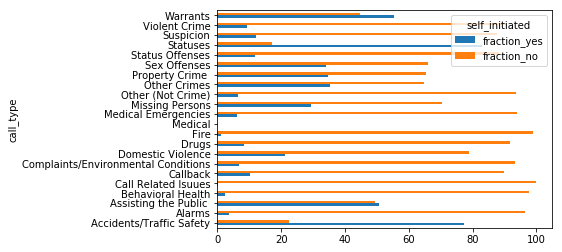

In [40]:
result[['fraction_yes','fraction_no']].plot(kind='barh')

In [42]:
new_orleans.processed_data.columns

Index(['index', '(ALTERNATE) - Neighborhood Statistical Areas',
       'BLOCK_ADDRESS', 'Beat', 'Blocks', 'Census - 2010', 'Council Districts',
       'Disposition', 'DispositionText', 'InitialPriority',
       ...
       'B25072_011E', 'B25072_010E', 'B25072_016E', 'B25072_017E',
       'B25072_014E', 'B25072_015E', 'B25072_018E', 'B25072_019E', 'call_type',
       'self_initiated'],
      dtype='object', length=396)

In [57]:
import geopandas as gp

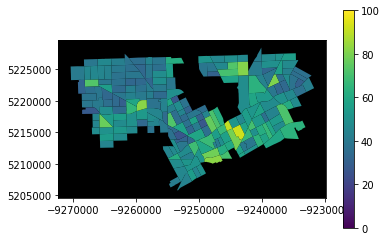

In [66]:
gp.GeoDataFrame(detroit.processed_data.groupby(['self_initiated','GEOID'])
                            .count()
                            .reset_index()
                            .pivot_table(index='GEOID', columns='self_initiated', values='index')
                            .assign(total_calls = lambda x : x.Yes + x.No )
                            .assign(fraction_yes = lambda x: 100*x.Yes/x.total_calls,
                                    fraction_no = lambda x: 100*x.No/x.total_calls)
                            .fillna(0)
                            .assign(geometry = detroit.load_tracts().set_index('GEOID').geometry)
, geometry='geometry', crs={'init':'epsg:4326'}).to_crs({'init':'epsg:3857'}).plot(column='fraction_yes',legend=True, vmin=0,vmax=100).set_facecolor('black')


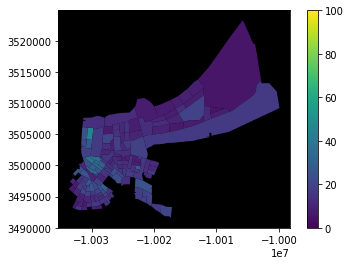

In [68]:
gp.GeoDataFrame(new_orleans.processed_data.groupby(['self_initiated','GEOID'])
                            .count()
                            .reset_index()
                            .pivot_table(index='GEOID', columns='self_initiated', values='index')
                            .assign(total_calls = lambda x : x.Yes + x.No + x.other )
                            .assign(fraction_yes = lambda x: 100*x.Yes/x.total_calls,
                                    fraction_no = lambda x: 100*x.No/x.total_calls)
                            .fillna(0)
                            .assign(geometry = new_orleans.load_tracts().set_index('GEOID').geometry)
, geometry='geometry', crs={'init':'epsg:4326'}).to_crs({'init':'epsg:3857'}).plot(column='fraction_yes',legend=True, vmin=0, vmax=100).set_facecolor('black')


In [ ]:
gp.GeoDataFrame(new_orleans.processed_data.groupby(['GEOID'])
                            .count()
                            .assign(geometry = new_orleans.load_tracts().set_index('GEOID').geometry),geometry='geometry', crs={'init':'epsg:4326'}).to_crs({'init':'epsg:3857'}).plot(column='index',legend=True).set_facecolor('black')

In [70]:
gp.GeoDataFrame(new_orleans.processed_data.groupby(['GEOID'])
                            .count()
                            .reset_index()
                            .assign(geometry = new_orleans.load_tracts().set_index('GEOID').geometry)
, geometry='geometry', crs={'init':'epsg:4326'}).to_crs({'init':'epsg:3857'}).plot(column='index',legend=True, vmin=0, vmax=100).set_facecolor('black')


AttributeError: 'float' object has no attribute 'is_empty'

In [ ]:
new_orleans.processed_data.groupby(['self_initiated','GEOID'])
                            .count()
                            .reset_index()
                            .pivot_table(index='GEOID', columns='self_initiated', values='index')
                            .assign(total_calls = lambda x : x.Yes + x.No )
                            .assign(fraction_yes = lambda x: 100*x.Yes/x.total_calls,
                                    fraction_no = lambda x: 100*x.No/x.total_calls)
                            .fillna(0)

In [5]:
# new_orleans.process_data()
# seattle.process_data()
# detroit.process_data()
charleston.process_data()

procesisng geo for  <src.cities.charleston.Charleston object at 0x7f0403631a58>
Loading data from local cache
Reanaming positional columns
Converting Geo units


  0%|          | 0/1030527 [00:00<?, ?it/s]

Generating point geometries


  0%|          | 0/104 [00:00<?, ?it/s]

Joining to tracts


100%|██████████| 104/104 [00:40<00:00,  2.57it/s]


In [6]:
charleston.processed_data.head()

,index,Address,Call_Disposition,City,FID,lat,lng,Master_Incident_Number,Postal_Code,Problem,...,B25072_013E,B25072_012E,B25072_011E,B25072_010E,B25072_016E,B25072_017E,B25072_014E,B25072_015E,B25072_018E,B25072_019E
0,0,577-593 KING ST,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.792680,-79.941120,201900000003,29403,911 Open Line,...,6.0,30.0,11.0,56.0,89.0,51.0,52.0,7.0,0.0,7.0
1,1,201-204 CREEK BACK ST,LPA_Patrol Area,CHARLESTON,None,32.878194,-79.891741,201900000004,29492,Patrol Request,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Johnson St / Nassau St,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.801110,-79.942146,201900000009,29403,135C_Weapons Shots Heard Wpn,...,12.0,73.0,54.0,56.0,448.0,61.0,54.0,0.0,65.0,51.0
3,3,3672 Maybank Hwy,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.718354,-80.085195,201900000010,29455,135C_Weapons Shots Heard Wpn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17-73 IRON BOTTOM LN,LPA_Patrol Area,CHARLESTON,None,32.880130,-79.897128,201900000013,29492,Patrol Request,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
detroit.processed_data.head()

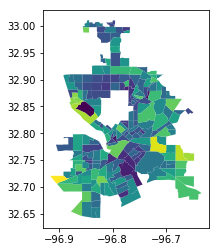

In [6]:
detroit.load_tracts().plot(column = 'B01003_001E' )

In [ ]:
dallas.processing_progress

In [ ]:
new_orleans.process_data()

In [ ]:
calls['Census - 2010'].describe()

In [28]:
detroit.raw_data.head()

,index,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,...,Council District,Longitude,Latitude,Incident Location,Hardest Hit Fund Areas,City Council Districts,Detroit Neighborhoods,Scout Car Areas,Counties,Zip Codes
0,0,201914004464,DPD,3800 block of HOLCOMB ST,48214,NaN,843020,UNKNOWN PROBLEM,UNKPROB,05/20/2019 11:58:31 PM,...,5.0,-82.996142,42.371491,"location\n(42.37149, -82.99614)",NaN,3.0,1.0,48.0,1345.0,19203.0
1,1,201914004463,DPD,7400 block of PARKWOOD ST,48210,NaN,825030,DISTURBANCE,DISTURB,05/20/2019 11:57:46 PM,...,6.0,-83.133554,42.326430,"location\n(42.32643, -83.13355)",18.0,5.0,36.0,21.0,1345.0,7314.0
2,2,201914004461,DPD,200 block of -BLK SMITH ST,48202,NaN,342010,SHOTS FIRED IP,SHOTS IP,05/20/2019 11:56:15 PM,...,5.0,-83.072944,42.373999,"location\n(42.374, -83.07294)",5.0,3.0,148.0,134.0,1345.0,14467.0
3,3,201914004459,DPD,1000 block of HIBBARD ST,48214,NaN,875030,HANGUP CALLS,HNGUP,05/20/2019 11:56:13 PM,...,5.0,-82.987616,42.357798,"location\n(42.3578, -82.98762)",NaN,3.0,76.0,51.0,1345.0,19203.0
4,4,201914004457,DPD,17200 block of ROSELAWN ST,48221,NaN,843020,UNKNOWN PROBLEM,UNKPROB,05/20/2019 11:55:25 PM,...,2.0,-83.152330,42.418006,"location\n(42.41801, -83.15233)",15.0,2.0,39.0,91.0,1345.0,19615.0


In [31]:
detroit.process_data()

procesisng geo for  <src.cities.detroit.Detroit object at 0x7fefa2fb2cf8>
Using cached version of  geo_positional
Converting Geo units


AttributeError: 'DataFrame' object has no attribute 'lat'

In [17]:
d = process(detroit)[['in_category','out_category']]

In [28]:
d.set_index('in_category').to_dict()['out_category']

{'TRAFFIC STOP': 'Accidents/Traffic Safety',
 'SPECIAL ATTENTION': 'Statuses',
 'DISTURBANCE': 'Complaints/Environmental Conditions',
 'REMARKS': nan,
 'START OF SHIFT INFORMATION': 'Statuses',
 'INVESTIGATE PERSON': 'Statuses',
 'UNKNOWN PROBLEM': 'Other (Not Crime)',
 'ASSAULT AND BATTERY': 'Violent Crime',
 'TOWING DETAIL': nan,
 'FELONIOUS ASSAULT IP': 'Violent Crime',
 'LARCENY REPORT': 'Property Crime ',
 'AUTO X UNK INJ / IMPAIRED': 'Accidents/Traffic Safety',
 'BUS BOARDING': nan,
 'VERIFIED ALR / PERSON W/O CODE': nan,
 'UDAA REPORT': nan,
 'PERSON WITH WEAPON': 'Other Crimes',
 'ONE DOWN OR OVER THE WHEEL': 'Behavioral Health',
 'BURGLARY OCCUPIED RESD I/P': 'Property Crime ',
 'SHOTS FIRED IP': 'Other Crimes',
 'INVESTIGATE AUTO': 'Statuses',
 'MALICIOUS DESTRUCTION I/P': 'Property Crime ',
 'MISCELLANEOUS TRAFFIC': 'Accidents/Traffic Safety',
 'BUILDING CHECK': 'Statuses',
 'FRAUD REPORT': 'Other Crimes',
 'PANIC / DURESS ALARM': 'Alarms',
 'AUTO X OR PED X - INJURIES': 'Ac

In [22]:
detroit.raw_data.head().columns

Index(['index', 'Incident ID', 'Agency', 'Incident Address', 'Zip Code',
       'Priority', 'Call Code', 'Call Description', 'Category', 'Call Time',
       'Time of Call', 'Precinct/Scout Car Area', 'Responding Unit',
       'Officer Initiated', 'Intake Time', 'Dispatch Time', 'Travel Time',
       'Total Response Time', 'Time On Scene', 'Total Time', 'Neighborhood',
       'Census Block GEOID', 'Council District', 'Longitude', 'Latitude',
       'Incident Location', 'Hardest Hit Fund Areas', 'City Council Districts',
       'Detroit Neighborhoods', 'Scout Car Areas', 'Counties', 'Zip Codes'],
      dtype='object')

In [88]:
call_maps = load_call_mappings()
call_maps[call_maps['City'].str.replace(" ","") == new_orleans.BASE_NAME ]

,City,Column_name,in_category,Count,out_category,Category - Alternate
1108,New Orleans,InitialTypeText,COMPLAINT OTHER,444247,Complaints/Environmental Conditions,NaN
1109,New Orleans,InitialTypeText,TRAFFIC INCIDENT,255264,Accidents/Traffic Safety,NaN
1110,New Orleans,InitialTypeText,"BURGLAR ALARM, SILENT",210483,Alarms,NaN
1111,New Orleans,InitialTypeText,DISTURBANCE (OTHER),152873,Complaints/Environmental Conditions,NaN
1112,New Orleans,InitialTypeText,AUTO ACCIDENT,106490,Accidents/Traffic Safety,NaN
1113,New Orleans,InitialTypeText,SUSPICIOUS PERSON,98091,Suspicion,NaN
1114,New Orleans,InitialTypeText,AREA CHECK,95463,Statuses,?
1115,New Orleans,InitialTypeText,WARR STOP WITH RELEASE,66966,NaN,NaN
1116,New Orleans,InitialTypeText,RETURN FOR ADDITIONAL INFO,60586,Statuses,Callback?
1117,New Orleans,InitialTypeText,THEFT,54881,Property Crime,NaN


In [86]:
call_types.load_call_mappings()

,City,Column_name,in_category,Count,out_category,Category - Alternate
0,Dallas,Call (911) Problem,58 - ROUTINE INVESTIGATION,62689,Statuses,NaN
1,Dallas,Call (911) Problem,11V - BURG MOTOR VEH,57997,Property Crime,NaN
2,Dallas,Call (911) Problem,6X - MAJOR DIST (VIOLENCE),40084,Complaints/Environmental Conditions,NaN
3,Dallas,Call (911) Problem,11R - BURG OF RES,32650,Property Crime,NaN
4,Dallas,Call (911) Problem,09V - UUMV,28866,Property Crime,?
5,Dallas,Call (911) Problem,09 - THEFT,24570,Property Crime,NaN
6,Dallas,Call (911) Problem,31 - CRIMINAL MISCHIEF,23261,NaN,NaN
7,Dallas,Call (911) Problem,40/01 - OTHER,22087,Other Crimes,NaN
8,Dallas,Call (911) Problem,40 - OTHER,18245,Other Crimes,NaN
9,Dallas,Call (911) Problem,20 - ROBBERY,17197,Violent Crime,NaN


In [89]:
new_orleans = NewOrleans()

call_types.process(new_orleans)
new_orleans.processed_data.call_type.value_counts()


Loading data from local cache


other                                  1478839
Complaints/Environmental Conditions     702923
Accidents/Traffic Safety                458163
Statuses                                301236
Alarms                                  228869
Property Crime                          195723
Other Crimes                            112485
Suspicion                               110645
Violent Crime                            26466
Behavioral Health                        25681
Medical Emergencies                      24790
Domestic Violence                        17939
Drugs                                    15749
Missing Persons                          13625
Sex Offenses                              6906
Status Violations                         6104
Fire                                      4239
Status Offenses                            970
Officer Needs Help                         547
Other (Not Crime)                            2
Name: call_type, dtype: int64

In [77]:
call_types.load_self_initiated_mappings()

,City,Column_name,in_category,Count,out_category
0,Seattle,Call Type,ONVIEW,1588291.0,Yes
1,Seattle,Call Type,911,1316124.0,No
2,Seattle,Call Type,"TELEPHONE OTHER, NOT 911",904766.0,No
3,Seattle,Call Type,ALARM CALL (NOT POLICE ALARM),113438.0,No
4,Seattle,Call Type,POLICE (VARDA) ALARM,157.0,No
5,Seattle,Call Type,HISTORY CALL (RETRO),91.0,No
6,Seattle,Call Type,IN PERSON COMPLAINT,69.0,No
7,Seattle,Call Type,TEXT MESSAGE,49.0,No
8,Seattle,Call Type,PROACTIVE (OFFICER INITIATED),47.0,Yes
9,Seattle,Call Type,SCHEDULED EVENT (RECURRING),34.0,No


In [78]:
new_orleans.BASE_NAME

'NewOrleans'

In [82]:
call_types.load_self_initiated_mappings().City.str.replace(' ','') == new_orleans.BASE_NAME

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
Name: City, dtype: bool

Loading data from local cache


Statuses                               836492
Accidents/Traffic Safety               687393
Complaints/Environmental Conditions    534415
Suspicion                              448280
Property Crime                         422253
Other Crimes                           238458
Assisting the Public                   143145
Alarms                                 121135
Domestic Violence                      115427
Drugs                                   57353
Liquor Violations                       56414
Warrants                                53776
Violent Crime                           41162
Call Related Issues                     26459
Missing Persons                         20616
Sex Offenses                            13116
other                                    7197
Status Violations                        2348
Behavioral Health                         926
Medical                                   191
Officer Needs Help                         56
Medical Emergencies               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c43cb898>]],
      dtype=object)

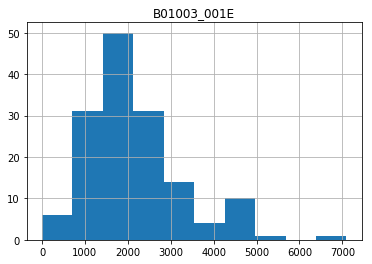

In [56]:
new_orleans.load_tracts()[['B01003_001E']].hist()

In [52]:
new_orleans.load_tracts()[['B01001_002E','B01001_026E']].sum(axis=1).head()

0    2238.0
1    2025.0
2    3264.0
3    1669.0
4    1844.0
dtype: float64

[20:46:43.559 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1



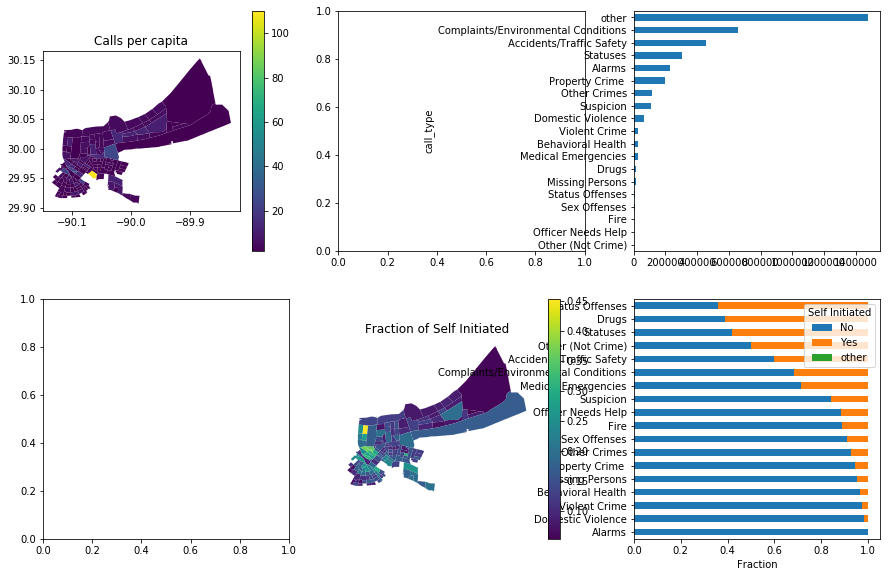

In [57]:
vis.make_city_level_report(new_orleans)

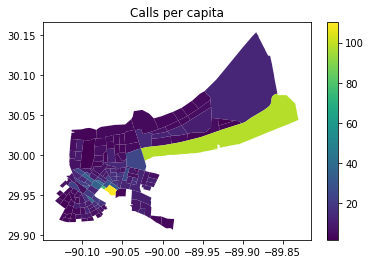

In [46]:
vis.plot_call_volume(new_orleans,norm_by='capita')

mapping population


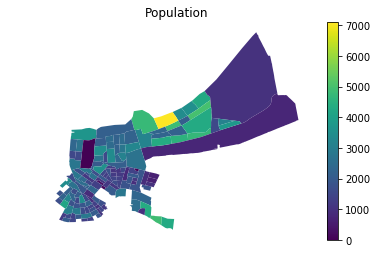

In [30]:
vis.map_population(new_orleans)

In [23]:
for col in new_orleans.raw_data.columns: print(col)

index
(ALTERNATE) - Neighborhood Statistical Areas
BLOCK_ADDRESS
Beat
Blocks
Census - 2010
Council Districts
Disposition
DispositionText
InitialPriority
InitialType
InitialTypeText
Location
MapX
MapY
NOPD_Item
Neighborhood Organizations
Police Districts
PoliceDistrict
Priority
Self-Reported Neighborhood Organizations (SRNOs) Boundaries
SelfInitiated
TimeArrive
TimeClosed
TimeCreate
TimeDispatch
Type
TypeText
Zip
Zip Codes


In [ ]:
frame = (new_orleans.processed_data.groupby(['GEOID'])
                       .count()
                       .fillna(0)
                       .div( new_orleans.load_tracts().set_index("GEOID")['B01003_001E'], axis=0)
                       .replace(np.inf,0)
        )
frame.head()

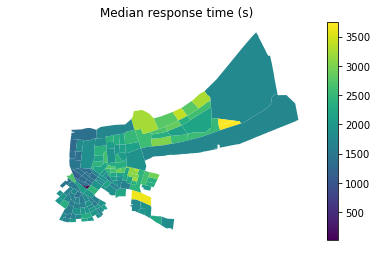

In [40]:
vis.map_median_response_time(new_orleans)

In [ ]:
gpd.GeoDataFrame(vis.map_avg_response_time(new_orleans)

mapping call volune


[20:38:15.367 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1



mapping self initated
mapping population
mapping population
mapping response time 
Plotting call type breakdown
Plotting self initated by call type
plotting respone time distribution


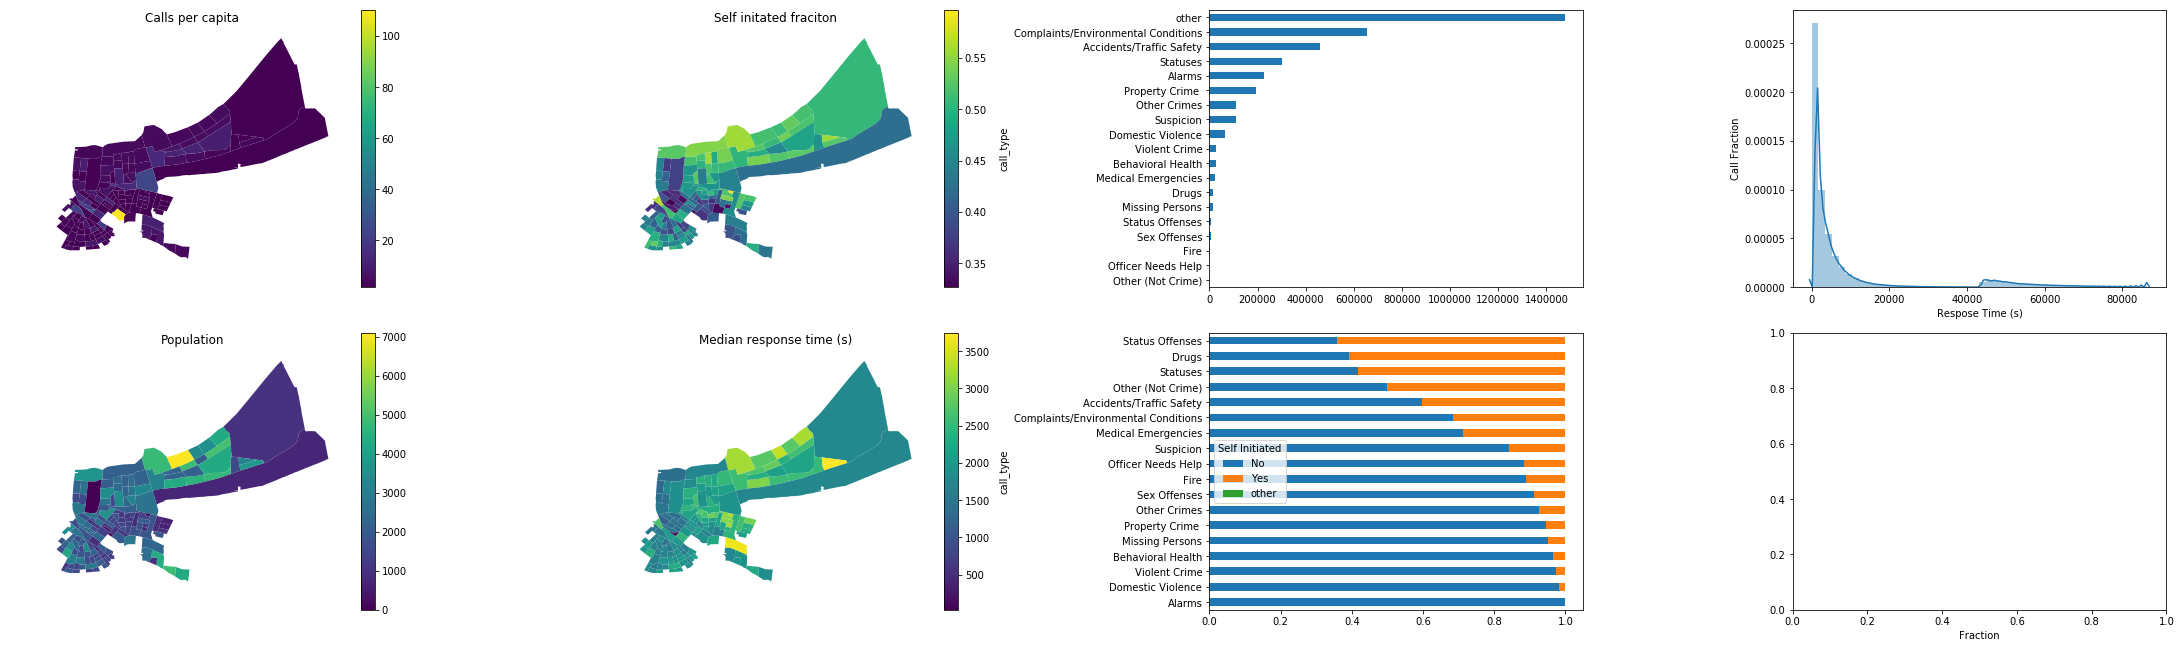

In [81]:
vis.make_city_level_report(new_orleans)

In [44]:
vis.map_avg_response_time(new_orleans)

AttributeError: module 'src.visualization.visualize' has no attribute 'map_avg_response_time'

In [ ]:
da

In [124]:
m[diss.iloc[0]]

'Enforcement Activity '

In [122]:
diss = new_orleans.load_raw_data()['DispositionText']

In [90]:
charleston.raw_data.head()

,index,Address,Call_Disposition,City,FID,LATITUDE,LONGITUDE,Master_Incident_Number,Postal_Code,Problem,Response_Date,State,Time_CallClosed,X,Y
0,0,577-593 KING ST,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.792680,-79.941120,201900000003,29403,911 Open Line,1/1/2019,SC,1/1/2019,NaN,NaN
1,1,201-204 CREEK BACK ST,LPA_Patrol Area,CHARLESTON,None,32.878194,-79.891741,201900000004,29492,Patrol Request,1/1/2019,SC,1/1/2019,NaN,NaN
2,2,Johnson St / Nassau St,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.801110,-79.942146,201900000009,29403,135C_Weapons Shots Heard Wpn,1/1/2019,SC,1/1/2019,NaN,NaN
3,3,3672 Maybank Hwy,LCCN_Call Completed/ No Rep,CHARLESTON,None,32.718354,-80.085195,201900000010,29455,135C_Weapons Shots Heard Wpn,1/1/2019,SC,1/1/2019,NaN,NaN
4,4,17-73 IRON BOTTOM LN,LPA_Patrol Area,CHARLESTON,None,32.880130,-79.897128,201900000013,29492,Patrol Request,1/1/2019,SC,1/1/2019,NaN,NaN


In [119]:
dallas.load_raw_data()['DispositionText']

KeyError: 'DispositionText'

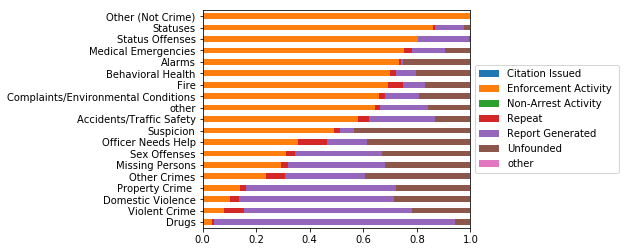

In [188]:
vis.plot_disposition_fraction_by_call_Type(new_orleans)

KeyError: 'Enforcement Activity'

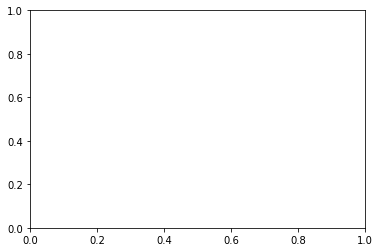

In [179]:
vis.plot_disposition_fraction_by_call_Type(new_orleans)

In [275]:
new_orleans=NewOrleans()
d = new_orleans.clean_data()

In [276]:
detroit = Detroit()
d = detroit.clean_data()

Plotting self initated by call type


[13:15:19.384 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



plotting respone time distribution


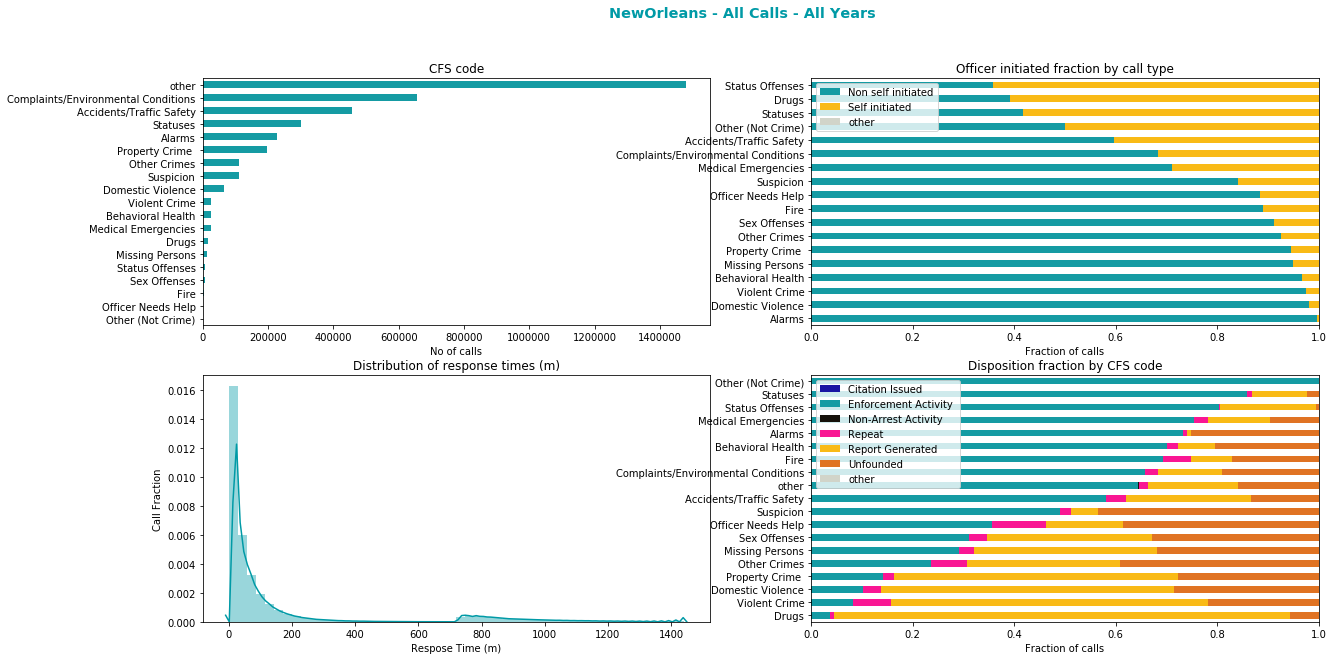

In [293]:
axs = vis.make_city_level_charts(new_orleans)

In [258]:
a = axs[3]

In [250]:
box = a.get_position()

In [254]:
box.x0

0.04300347222222222

Plotting self initated by call type


[18:34:32.507 WARNING] /home/stuartlynn/.conda/envs/fishing/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"



plotting respone time distribution


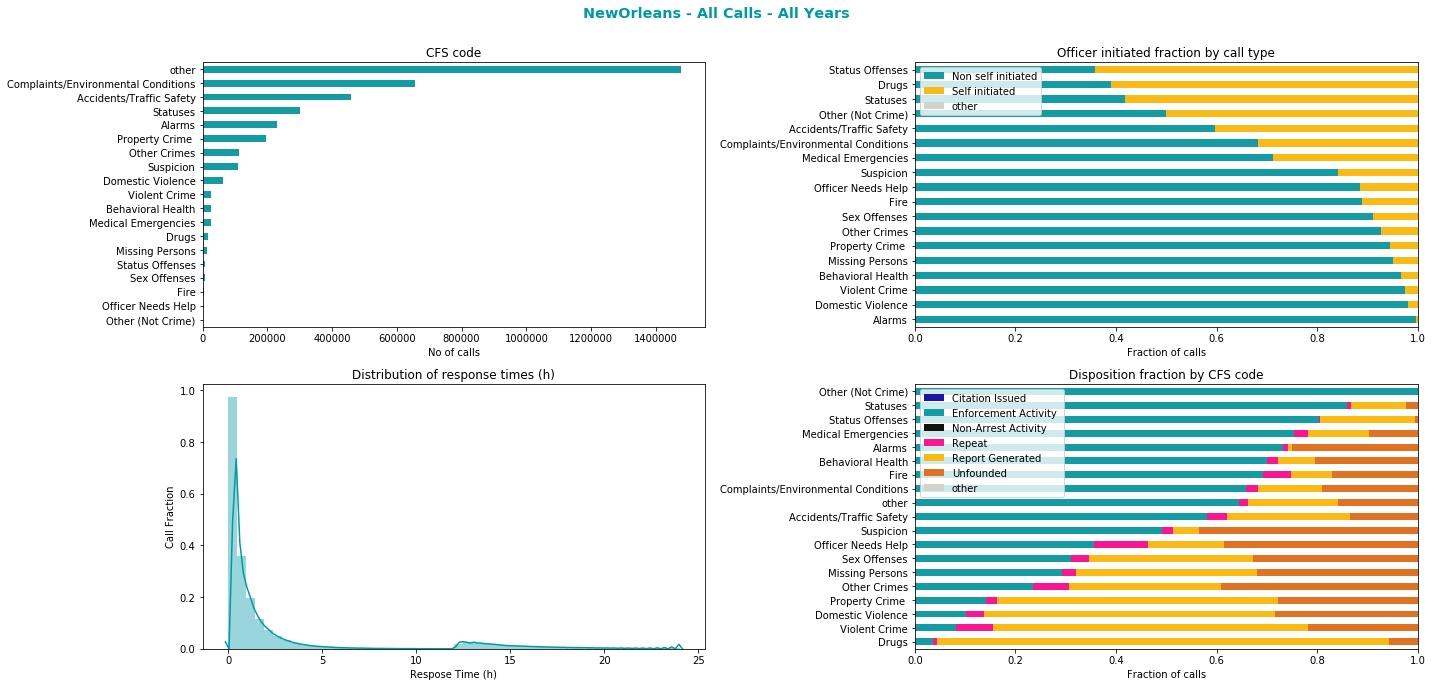

In [298]:
vis.make_city_level_charts(new_orleans)

norming by  1
norming by  1
norming by  1
norming by  1
norming by  1


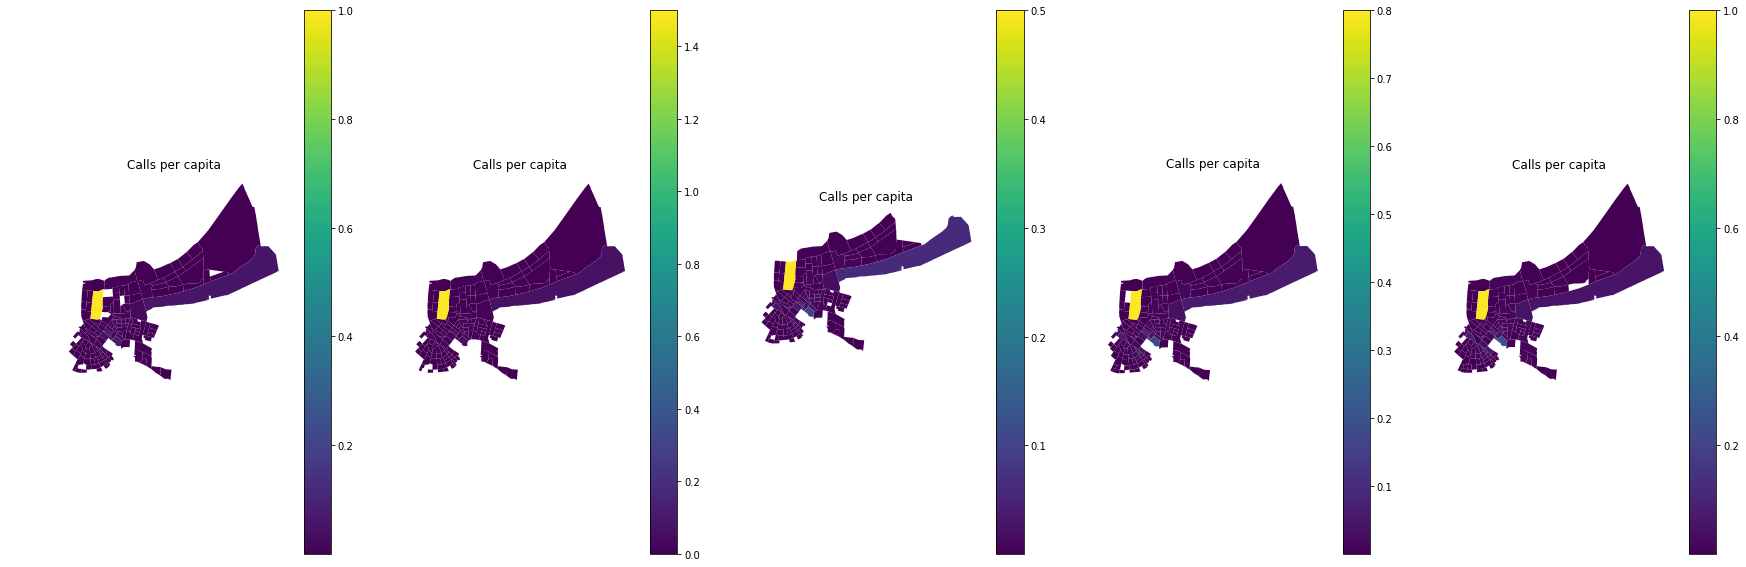

In [351]:
fig, axs = plt.subplots(1,len(range(2014,2019)),figsize=(30,10))
axs=axs.flatten()

for index,year in enumerate(range(2014,2019)):
    vis.map_call_volume(new_orleans, 
                        year=year, 
                        call_type='Drugs',
                        norm_by=None,
                        ax=axs[index])


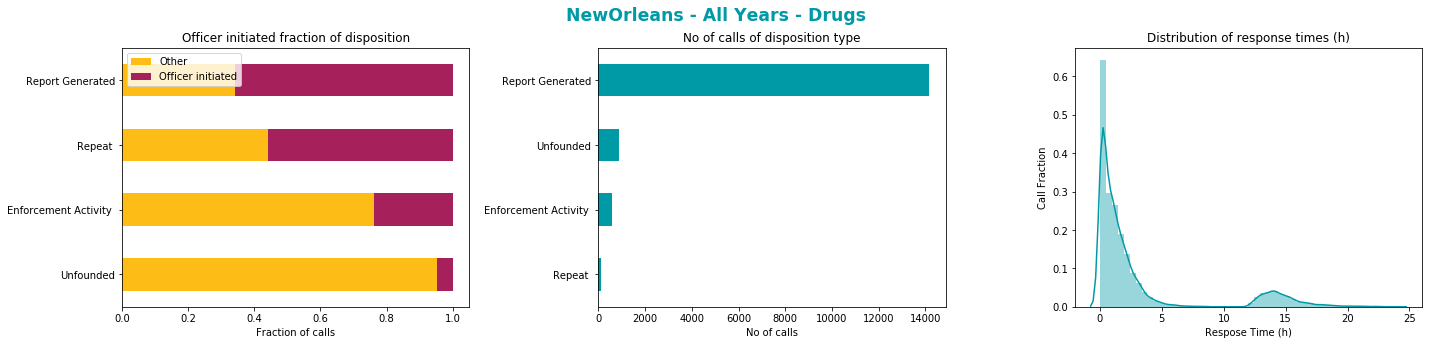

In [367]:
vis.make_simple_call_type_report(new_orleans,call_type='Drugs')

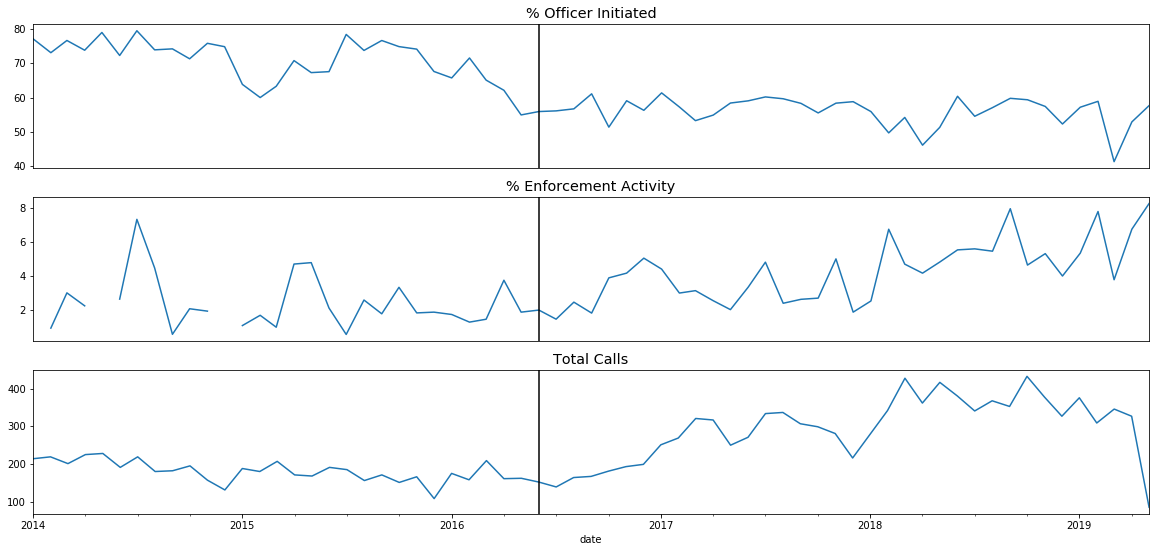

In [382]:
from datetime import datetime
from matplotlib.gridspec import GridSpec

fig,axs = plt.subplots(3,1,figsize=(20,10))

# for index,year in enumerate(range(2014,2019)):
#     ax= fig.add_subplot(gs[1:2,index+1])
#     vis.map_call_volume(new_orleans, 
#                         year=year, 
#                         call_type='Drugs',
#                         norm_by='capita',
#                         ax=ax,
#                         scheme='percentiles')

axs =axs.flatten()
(new_orleans.clean_data()
            .loc[lambda x: x.call_type=='Drugs']
            .groupby(['month','year','self_initiated'])
            .count()
             ['index']
            .reset_index()
            .pivot_table(index = ['month','year'], values='index', columns='self_initiated')
            .assign(total = lambda x : x.sum(axis=1) )
            .pipe(lambda x : 100* x[['No','Yes']].div(x.total,axis=0).assign(total = x.total))
            .drop('total',axis=1)
            .reset_index()
            .pipe( lambda x : x.assign(date = x.apply( lambda row: datetime(int(row.year), int(row.month),1),axis=1)))
            .set_index('date')
            .Yes
            .plot(ax=axs[0])
)

axs[0].get_xaxis().set_visible(False)
axs[0].set_title('% Officer Initiated', fontsize='x-large')
axs[0].set_ylabel('')
axs[0].axvline(datetime(2016, 6, 1), color='k')

(new_orleans.clean_data()
            .loc[lambda x: x.call_type=='Drugs']
            .groupby(['month','year','disposition'])
            .count()
             ['index']
            .reset_index()
            .pivot_table(index = ['month','year'], values='index', columns='disposition')
            .assign(total = lambda x : x.sum(axis=1) )
            .pipe(lambda x : 100 *x.div(x.total,axis=0).assign(total = x.total))
            .drop('total',axis=1)
            .reset_index()
            .pipe( lambda x : x.assign(date = x.apply( lambda row: datetime(int(row.year), int(row.month),1),axis=1)))
            .set_index('date')
             ['Enforcement Activity ']
            .plot(ax=axs[1])
)
axs[1].get_xaxis().set_visible(False)
axs[1].set_title('% Enforcement Activity',fontsize='x-large')
axs[1].set_ylabel('')
axs[1].axvline(datetime(2016, 6, 1), color='k')

(new_orleans.clean_data()
            .loc[lambda x: x.call_type=='Drugs']
            .groupby(['year','month'])
            .count()
            .reset_index()
            .pipe( lambda x : x.assign(date = x.apply( lambda row: datetime(int(row.year), int(row.month),1),axis=1)))
            .set_index('date')
             ['index']
            .plot(ax=axs[2])
)
axs[2].set_ylabel('')
axs[2].set_title('Total Calls',fontsize='x-large')
# plt.tight_layout()
axs[2].axvline(datetime(2016, 6, 1), color='k')

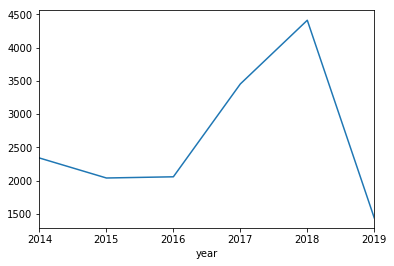

In [325]:
(new_orleans.clean_data()
            .loc[lambda x: x.call_type=='Drugs']
            .groupby(['year'])
            .count()
             ['index']
            .plot()
)

norming by  9
mapping population


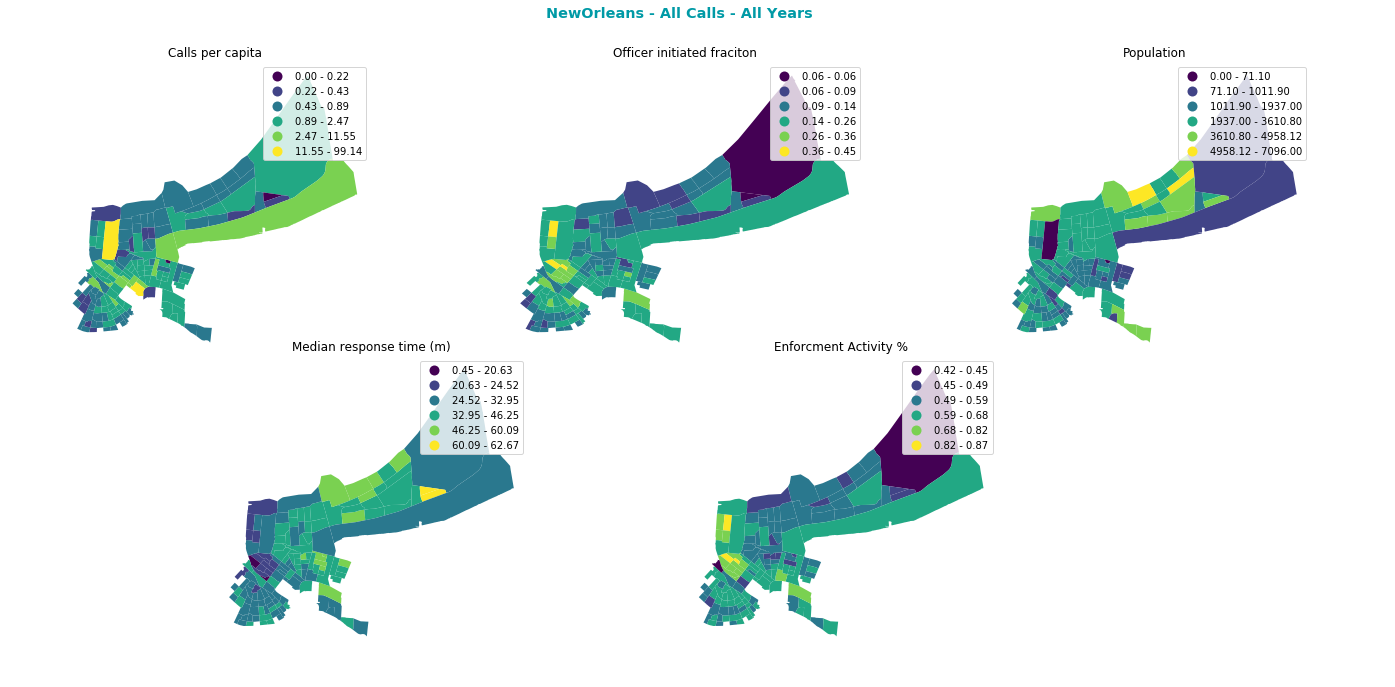

In [361]:
axs = vis.make_city_level_maps(new_orleans, scheme='percentiles')


User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=500)